# Model development

Apply the model for small instances (e.g. 6 facilities, and 10 oil spills in Hudson)++

Outline of this script:
1. Input data
2. Optimization Model
3. Output in a form of Network Diagram

# Data

In [1]:
# import custom functions
import data_preparation
import custom_func
import model
import model_analysis
# import libraries
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
# Import data
# spill_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='spills', header=0).copy()
# spill_data = spill_data.sample(n=100)
station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
#station_data = station_data.iloc[[7,9,10, 13,15,16, 18]] # for small scale problem, we select stations nearby Hudson Bay & Strait
input_parameters = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='Estimated parameters', header=0).copy()
sensitivity_dataR = gpd.read_file('Inputs/ArcGIS_data/Sensitivity_data/Sensitivity_data5.shp').copy()

In [3]:
# spill_data.to_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills')
spill_data = pd.read_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()


In [4]:
display(spill_data)
display(station_data)

,Unnamed: 0,Spill #,Coordinates,Spill size,Spill Size Type,Resource needed,1st Ranking,Skimmer,Dispersant,Burning materials
0,73,o74,"(64.50421666200003, -79.40601964599995)",8500,Large,425.0,CDU,0,800,0
1,97,o98,"(73.85872545439102, -77.06292927588505)",4820,Large,241.0,MCR,54,0,0
2,52,o53,"(58.851133884186325, -94.20693472697955)",3200,Large,160.0,ISB,0,0,257
3,177,o178,"(69.45553911240434, -123.85642478117892)",6160,Large,308.0,MCR,54,0,0
4,202,o203,"(65.38888826422587, -65.95218121659215)",5190,Large,259.5,ISB,0,0,257
...,...,...,...,...,...,...,...,...,...,...
95,206,o207,"(61.2787986028355, -114.41660450627202)",6480,Large,324.0,MCR,54,0,0
96,42,o43,"(70.5897855138361, -120.20613457011686)",5790,Large,289.5,ISB,0,0,257
97,191,o192,"(68.70553599203063, -134.23381941293684)",6430,Large,321.5,ISB,0,0,257
98,173,o174,"(72.04548849091111, -119.40991256546548)",800,Small,40.0,CDU,0,100,0


,no.,Station #,Station,Name,Coordinates,skimmers,booms,dispersant,burning,Resources total,Converted resources,Capacity,Unnamed: 12,Unnamed: 13
0,1,s1,Station 1,Beafort sea,"(70,-134)",0,1,33,NaN,34,NaN,0,NaN,NaN
1,2,s2,Station 2,Northwestern passage,"(70.64, -119.43)",8,8,55,NaN,71,NaN,80,NaN,NaN
2,3,s3,Station 3,Kitikmeot Region,"(67.09, -112.32)",1,4,58,NaN,63,NaN,80,NaN,NaN
3,4,s4,Station 4,Fort Smith,"(62.60, -113.19)",10,3,32,NaN,45,NaN,80,NaN,NaN
4,5,s5,Station 5,Hay River,"(60.53, -114.38)",40,10,100,NaN,150,NaN,0,NaN,NaN
5,6,s6,Station 6,NaN,"(68.86,-103.19)",10,3,44,NaN,57,NaN,80,NaN,"(60.758054, -115.789890)"
6,7,s7,Station 7,NaN,"(63.93, -101.14)",0,3,47,NaN,50,NaN,80,NaN,"(58.55084,-93.62352)"
7,8,s8,Station 8,NaN,"(60.06, -95.89)",3,5,58,NaN,66,NaN,80,NaN,"(69.459, -132.974304)"
8,9,s9,Station 9,NaN,"(75.11, -95.71)",5,7,59,NaN,71,NaN,80,NaN,"(63.742885, -68.464958)"
9,10,s10,Station 10,Kivalliq Region,"(63.03, -91.74)",4,9,36,NaN,49,NaN,80,NaN,NaN


## Input parameters

In [5]:
NumberStMax = 5
DistanceMax = 250 # (DistanceMax*80)km  convert it to kilometer, typical speed 20km/hr -> 480km/day
TimeRMax = 220  # covert it into hours or minutes

In [6]:
BigM = 5000000
current_vs_proposed = 'proposed' # current
MaxFO = 1
Budget = 20000000
W = [0.25, 0.25, 0.25, 0.25]
QuantityMin = 2

In [7]:
# 
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, Cu_sor \
= data_preparation.generate_input_data(station_data, spill_data, input_parameters)
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
coordinates_st = custom_func.extract_station_coordinate(station_data)

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20']


In [8]:
max(Distance.values())

82.62173596329828

In [9]:
print('coordinates_st')
display(coordinates_st)

print('Demand')
display(Demand)
print('Availability')
display(Availability)
print('Eff')
display(Eff)

print('Distance')
display(Distance)

print('TimeR')
display(TimeR)

print('Cf_s'); display(Cf_s)
print('Cu_sor')
display(Cu_sor)

coordinates_st


([[70.0, -134.0],
  [70.63999938964844, -119.43000030517578],
  [67.08999633789062, -112.31999969482422],
  [62.599998474121094, -113.19000244140625],
  [60.529998779296875, -114.37999725341797],
  [68.86000061035156, -103.19000244140625],
  [63.93000030517578, -101.13999938964844],
  [60.060001373291016, -95.88999938964844],
  [75.11000061035156, -95.70999908447266],
  [63.029998779296875, -91.73999786376953],
  [62.66999816894531, -92.70800018310547],
  [73.4000015258789, -88.16000366210938],
  [73.4000015258789, -81.83000183105469],
  [64.2020034790039, -83.91000366210938],
  [71.70999908447266, -74.97000122070312],
  [67.66999816894531, -76.37999725341797],
  [64.62000274658203, -77.41000366210938],
  [68.93000030517578, -69.16999816894531],
  [63.150001525878906, -69.68000030517578],
  [68.93000030517578, -65.56999969482422]],
 {'s1': [70.0, -134.0],
  's2': [70.63999938964844, -119.43000030517578],
  's3': [67.08999633789062, -112.31999969482422],
  's4': [62.599998474121094, -11

Demand


{('o74', 'm'): 0,
 ('o74', 'c'): 31,
 ('o74', 'i'): 0,
 ('o98', 'm'): 0,
 ('o98', 'c'): 31,
 ('o98', 'i'): 0,
 ('o53', 'm'): 0,
 ('o53', 'c'): 110,
 ('o53', 'i'): 0,
 ('o178', 'm'): 0,
 ('o178', 'c'): 0,
 ('o178', 'i'): 157,
 ('o203', 'm'): 0,
 ('o203', 'c'): 5,
 ('o203', 'i'): 0,
 ('o127', 'm'): 0,
 ('o127', 'c'): 5,
 ('o127', 'i'): 0,
 ('o172', 'm'): 0,
 ('o172', 'c'): 0,
 ('o172', 'i'): 7,
 ('o51', 'm'): 0,
 ('o51', 'c'): 0,
 ('o51', 'i'): 37,
 ('o7', 'm'): 0,
 ('o7', 'c'): 0,
 ('o7', 'i'): 37,
 ('o30', 'm'): 100,
 ('o30', 'c'): 0,
 ('o30', 'i'): 0,
 ('o221', 'm'): 100,
 ('o221', 'c'): 0,
 ('o221', 'i'): 0,
 ('o64', 'm'): 0,
 ('o64', 'c'): 0,
 ('o64', 'i'): 37,
 ('o25', 'm'): 0,
 ('o25', 'c'): 0,
 ('o25', 'i'): 37,
 ('o94', 'm'): 0,
 ('o94', 'c'): 0,
 ('o94', 'i'): 7,
 ('o119', 'm'): 0,
 ('o119', 'c'): 110,
 ('o119', 'i'): 0,
 ('o148', 'm'): 2,
 ('o148', 'c'): 0,
 ('o148', 'i'): 0,
 ('o208', 'm'): 0,
 ('o208', 'c'): 110,
 ('o208', 'i'): 0,
 ('o86', 'm'): 0,
 ('o86', 'c'): 110,
 ('o8

Availability


{('s1', 'm'): 80000.0,
 ('s1', 'c'): 100000.0,
 ('s1', 'i'): 160000.0,
 ('s2', 'm'): 100000.0,
 ('s2', 'c'): 180000.0,
 ('s2', 'i'): 80000.0,
 ('s3', 'm'): 180000.0,
 ('s3', 'c'): 20000.0,
 ('s3', 'i'): 160000.0,
 ('s4', 'm'): 200000.0,
 ('s4', 'c'): 200000.0,
 ('s4', 'i'): 80000.0,
 ('s5', 'm'): 120000.0,
 ('s5', 'c'): 120000.0,
 ('s5', 'i'): 40000.0,
 ('s6', 'm'): 100000.0,
 ('s6', 'c'): 40000.0,
 ('s6', 'i'): 140000.0,
 ('s7', 'm'): 200000.0,
 ('s7', 'c'): 160000.0,
 ('s7', 'i'): 40000.0,
 ('s8', 'm'): 140000.0,
 ('s8', 'c'): 100000.0,
 ('s8', 'i'): 60000.0,
 ('s9', 'm'): 60000.0,
 ('s9', 'c'): 80000.0,
 ('s9', 'i'): 80000.0,
 ('s10', 'm'): 40000.0,
 ('s10', 'c'): 160000.0,
 ('s10', 'i'): 100000.0,
 ('s11', 'm'): 140000.0,
 ('s11', 'c'): 80000.0,
 ('s11', 'i'): 140000.0,
 ('s12', 'm'): 120000.0,
 ('s12', 'c'): 180000.0,
 ('s12', 'i'): 160000.0,
 ('s13', 'm'): 80000.0,
 ('s13', 'c'): 20000.0,
 ('s13', 'i'): 160000.0,
 ('s14', 'm'): 160000.0,
 ('s14', 'c'): 180000.0,
 ('s14', 'i'): 80

Eff


{('s1', 'm'): 0.1,
 ('s1', 'c'): 0.7000000000000001,
 ('s1', 'i'): 0.6000000000000001,
 ('s2', 'm'): 0.30000000000000004,
 ('s2', 'c'): 0.2,
 ('s2', 'i'): 0.1,
 ('s3', 'm'): 0.4,
 ('s3', 'c'): 0.9,
 ('s3', 'i'): 0.30000000000000004,
 ('s4', 'm'): 0.30000000000000004,
 ('s4', 'c'): 0.2,
 ('s4', 'i'): 0.9,
 ('s5', 'm'): 0.2,
 ('s5', 'c'): 0.6000000000000001,
 ('s5', 'i'): 0.5,
 ('s6', 'm'): 0.5,
 ('s6', 'c'): 0.5,
 ('s6', 'i'): 0.30000000000000004,
 ('s7', 'm'): 0.4,
 ('s7', 'c'): 0.5,
 ('s7', 'i'): 0.30000000000000004,
 ('s8', 'm'): 0.2,
 ('s8', 'c'): 0.9,
 ('s8', 'i'): 0.30000000000000004,
 ('s9', 'm'): 0.30000000000000004,
 ('s9', 'c'): 1.0,
 ('s9', 'i'): 0.1,
 ('s10', 'm'): 0.1,
 ('s10', 'c'): 0.9,
 ('s10', 'i'): 1.0,
 ('s11', 'm'): 0.5,
 ('s11', 'c'): 0.2,
 ('s11', 'i'): 0.4,
 ('s12', 'm'): 0.2,
 ('s12', 'c'): 0.9,
 ('s12', 'i'): 0.9,
 ('s13', 'm'): 0.30000000000000004,
 ('s13', 'c'): 0.1,
 ('s13', 'i'): 0.30000000000000004,
 ('s14', 'm'): 0.30000000000000004,
 ('s14', 'c'): 0.60000

Distance


{('o74', 's1'): 54.869901934884496,
 ('o74', 's2'): 40.49156344567654,
 ('o74', 's3'): 33.01539383228145,
 ('o74', 's4'): 33.83760408289111,
 ('o74', 's5'): 35.19905444057435,
 ('o74', 's6'): 24.179549221206393,
 ('o74', 's7'): 21.741562470949656,
 ('o74', 's8'): 17.072568947254137,
 ('o74', 's9'): 19.449994856605564,
 ('o74', 's10'): 12.421767498345352,
 ('o74', 's11'): 13.427844700607151,
 ('o74', 's12'): 12.4806713018879,
 ('o74', 's13'): 9.2201208377404,
 ('o74', 's14'): 4.514110434032932,
 ('o74', 's15'): 8.46176922169844,
 ('o74', 's16'): 4.379380986759691,
 ('o74', 's17'): 1.9993727886691577,
 ('o74', 's18'): 11.151847626729145,
 ('o74', 's19'): 9.819846535019586,
 ('o74', 's20'): 14.526631698365959,
 ('o98', 's1'): 57.067679328992526,
 ('o98', 's2'): 42.489164310609084,
 ('o98', 's3'): 35.90093126483362,
 ('o98', 's4'): 37.840778519494805,
 ('o98', 's5'): 39.6259851186469,
 ('o98', 's6'): 26.600964621532054,
 ('o98', 's7'): 26.043905369333796,
 ('o98', 's8'): 23.34231052534236,

TimeR


{('o74', 's1'): 54.869901934884496,
 ('o74', 's2'): 40.49156344567654,
 ('o74', 's3'): 33.01539383228145,
 ('o74', 's4'): 33.83760408289111,
 ('o74', 's5'): 35.19905444057435,
 ('o74', 's6'): 24.179549221206393,
 ('o74', 's7'): 21.741562470949656,
 ('o74', 's8'): 17.072568947254137,
 ('o74', 's9'): 19.449994856605564,
 ('o74', 's10'): 12.421767498345352,
 ('o74', 's11'): 13.427844700607151,
 ('o74', 's12'): 12.4806713018879,
 ('o74', 's13'): 9.2201208377404,
 ('o74', 's14'): 4.514110434032932,
 ('o74', 's15'): 8.46176922169844,
 ('o74', 's16'): 4.379380986759691,
 ('o74', 's17'): 1.9993727886691577,
 ('o74', 's18'): 11.151847626729145,
 ('o74', 's19'): 9.819846535019586,
 ('o74', 's20'): 14.526631698365959,
 ('o98', 's1'): 57.067679328992526,
 ('o98', 's2'): 42.489164310609084,
 ('o98', 's3'): 35.90093126483362,
 ('o98', 's4'): 37.840778519494805,
 ('o98', 's5'): 39.6259851186469,
 ('o98', 's6'): 26.600964621532054,
 ('o98', 's7'): 26.043905369333796,
 ('o98', 's8'): 23.34231052534236,

Cf_s


{'s1': 10000000.0,
 's2': 3000000.0,
 's3': 9000000.0,
 's4': 6000000.0,
 's5': 10000000.0,
 's6': 7000000.0,
 's7': 3000000.0,
 's8': 4000000.0,
 's9': 6000000.0,
 's10': 6000000.0,
 's11': 5000000.0,
 's12': 7000000.0,
 's13': 3000000.0,
 's14': 4000000.0,
 's15': 8000000.0,
 's16': 9000000.0,
 's17': 10000000.0,
 's18': 3000000.0,
 's19': 5000000.0,
 's20': 5000000.0}

Cu_sor


{('s1', 'o74', 'm'): 54.869901934884496,
 ('s1', 'o74', 'c'): 109.73980386976899,
 ('s1', 'o74', 'i'): 164.6097058046535,
 ('s2', 'o74', 'm'): 40.49156344567654,
 ('s2', 'o74', 'c'): 80.98312689135308,
 ('s2', 'o74', 'i'): 121.47469033702961,
 ('s3', 'o74', 'm'): 33.01539383228145,
 ('s3', 'o74', 'c'): 66.0307876645629,
 ('s3', 'o74', 'i'): 99.04618149684434,
 ('s4', 'o74', 'm'): 33.83760408289111,
 ('s4', 'o74', 'c'): 67.67520816578222,
 ('s4', 'o74', 'i'): 101.51281224867333,
 ('s5', 'o74', 'm'): 35.19905444057435,
 ('s5', 'o74', 'c'): 70.3981088811487,
 ('s5', 'o74', 'i'): 105.59716332172306,
 ('s6', 'o74', 'm'): 24.179549221206393,
 ('s6', 'o74', 'c'): 48.35909844241279,
 ('s6', 'o74', 'i'): 72.53864766361917,
 ('s7', 'o74', 'm'): 21.741562470949656,
 ('s7', 'o74', 'c'): 43.48312494189931,
 ('s7', 'o74', 'i'): 65.22468741284897,
 ('s8', 'o74', 'm'): 17.072568947254137,
 ('s8', 'o74', 'c'): 34.145137894508274,
 ('s8', 'o74', 'i'): 51.21770684176241,
 ('s9', 'o74', 'm'): 19.449994856

In [10]:
OilSpills

['o74',
 'o98',
 'o53',
 'o178',
 'o203',
 'o127',
 'o172',
 'o51',
 'o7',
 'o30',
 'o221',
 'o64',
 'o25',
 'o94',
 'o119',
 'o148',
 'o208',
 'o86',
 'o93',
 'o108',
 'o131',
 'o6',
 'o10',
 'o41',
 'o144',
 'o169',
 'o185',
 'o87',
 'o168',
 'o24',
 'o190',
 'o97',
 'o162',
 'o106',
 'o157',
 'o175',
 'o136',
 'o145',
 'o3',
 'o28',
 'o45',
 'o27',
 'o219',
 'o9',
 'o212',
 'o139',
 'o214',
 'o113',
 'o160',
 'o191',
 'o104',
 'o184',
 'o37',
 'o165',
 'o83',
 'o114',
 'o155',
 'o91',
 'o138',
 'o183',
 'o11',
 'o181',
 'o159',
 'o48',
 'o129',
 'o158',
 'o117',
 'o153',
 'o101',
 'o44',
 'o109',
 'o59',
 'o121',
 'o13',
 'o128',
 'o90',
 'o79',
 'o161',
 'o163',
 'o130',
 'o107',
 'o42',
 'o31',
 'o19',
 'o22',
 'o187',
 'o84',
 'o132',
 'o198',
 'o49',
 'o116',
 'o124',
 'o134',
 'o82',
 'o220',
 'o207',
 'o43',
 'o192',
 'o174',
 'o78']

In [11]:
#max(Distance.values())
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min) 
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

In [12]:
Demand

{('o74', 'm'): 0,
 ('o74', 'c'): 31,
 ('o74', 'i'): 0,
 ('o98', 'm'): 0,
 ('o98', 'c'): 31,
 ('o98', 'i'): 0,
 ('o53', 'm'): 0,
 ('o53', 'c'): 110,
 ('o53', 'i'): 0,
 ('o178', 'm'): 0,
 ('o178', 'c'): 0,
 ('o178', 'i'): 157,
 ('o203', 'm'): 0,
 ('o203', 'c'): 5,
 ('o203', 'i'): 0,
 ('o127', 'm'): 0,
 ('o127', 'c'): 5,
 ('o127', 'i'): 0,
 ('o172', 'm'): 0,
 ('o172', 'c'): 0,
 ('o172', 'i'): 7,
 ('o51', 'm'): 0,
 ('o51', 'c'): 0,
 ('o51', 'i'): 37,
 ('o7', 'm'): 0,
 ('o7', 'c'): 0,
 ('o7', 'i'): 37,
 ('o30', 'm'): 100,
 ('o30', 'c'): 0,
 ('o30', 'i'): 0,
 ('o221', 'm'): 100,
 ('o221', 'c'): 0,
 ('o221', 'i'): 0,
 ('o64', 'm'): 0,
 ('o64', 'c'): 0,
 ('o64', 'i'): 37,
 ('o25', 'm'): 0,
 ('o25', 'c'): 0,
 ('o25', 'i'): 37,
 ('o94', 'm'): 0,
 ('o94', 'c'): 0,
 ('o94', 'i'): 7,
 ('o119', 'm'): 0,
 ('o119', 'c'): 110,
 ('o119', 'i'): 0,
 ('o148', 'm'): 2,
 ('o148', 'c'): 0,
 ('o148', 'i'): 0,
 ('o208', 'm'): 0,
 ('o208', 'c'): 110,
 ('o208', 'i'): 0,
 ('o86', 'm'): 0,
 ('o86', 'c'): 110,
 ('o8

# Model Configuration 1
## Table 3 (Row 1)

In [13]:
import model

In [14]:
model, select, deploy, mvars, names, values, \
        spill_df, station_df, cover_1s, select_1s, deploy_1s, ResponseTimeT, coverage_percentage, assignment  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, Cu_sor, Budget,
          BigM, MaxFO)

--------------MIP-moo--------
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-04
Set parameter PoolSolutions to value 1024
Set parameter PoolGap to value 0.8
Set parameter LogFile to value "Outputs/Logfiles/model_moo(Jul 08,0036).log"
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 16002 rows, 8020 columns and 62040 nonzeros
Model fingerprint: 0x3029efee
Variable types: 6000 continuous, 2020 integer (2020 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+12]
  Objective range  [3e-05, 1e+07]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+07]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

---------------------------------------------------------------------------
Mult

In [15]:
assignment

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o74,s8,60.060001,-95.889999,64.504219,-79.406021,c,31.0,17.072569
1,o74,s10,63.029999,-91.739998,64.504219,-79.406021,c,31.0,12.421767
2,o74,s12,73.400002,-88.160004,64.504219,-79.406021,c,31.0,12.480671
3,o74,s18,68.930000,-69.169998,64.504219,-79.406021,c,31.0,11.151848
4,o98,s8,60.060001,-95.889999,73.858727,-77.062927,c,31.0,23.342311
...,...,...,...,...,...,...,...,...,...
364,o174,s12,73.400002,-88.160004,72.045486,-119.409912,c,110.0,31.279250
365,o174,s18,68.930000,-69.169998,72.045486,-119.409912,c,110.0,50.336420
366,o78,s8,60.060001,-95.889999,63.448772,-79.562271,m,20.0,16.675685
367,o78,s12,73.400002,-88.160004,63.448772,-79.562271,m,20.0,13.150968


In [16]:
cover_1s

o74   s18    1.0
o98   s18    1.0
o53   s8     1.0
o178  s8     1.0
o203  s18    1.0
            ... 
o207  s8     1.0
o43   s8     1.0
o192  s8     1.0
o174  s8     1.0
o78   s18    1.0
Length: 97, dtype: float64

In [17]:
select_1s

s18    1.0
s8     1.0
s12    1.0
s10    1.0
dtype: float64

In [18]:
deploy_1s

o74   s8   c     31.0
      s10  c     31.0
      s12  c     31.0
      s18  c     31.0
o98   s8   c     31.0
                ...  
o174  s12  c    110.0
      s18  c    110.0
o78   s8   m     20.0
      s12  m     20.0
      s18  m     20.0
Length: 369, dtype: float64

In [19]:
assignment

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o74,s8,60.060001,-95.889999,64.504219,-79.406021,c,31.0,17.072569
1,o74,s10,63.029999,-91.739998,64.504219,-79.406021,c,31.0,12.421767
2,o74,s12,73.400002,-88.160004,64.504219,-79.406021,c,31.0,12.480671
3,o74,s18,68.930000,-69.169998,64.504219,-79.406021,c,31.0,11.151848
4,o98,s8,60.060001,-95.889999,73.858727,-77.062927,c,31.0,23.342311
...,...,...,...,...,...,...,...,...,...
364,o174,s12,73.400002,-88.160004,72.045486,-119.409912,c,110.0,31.279250
365,o174,s18,68.930000,-69.169998,72.045486,-119.409912,c,110.0,50.336420
366,o78,s8,60.060001,-95.889999,63.448772,-79.562271,m,20.0,16.675685
367,o78,s12,73.400002,-88.160004,63.448772,-79.562271,m,20.0,13.150968


In [20]:
assignment_df = pd.DataFrame(columns=list(assignment.columns.values))
for i,o in enumerate(assignment['Spill #'].unique()):
    minD = min(assignment.loc[assignment['Spill #'] == o]['Distance'])
    df = assignment.iloc[np.where(assignment['Distance'] == minD)[0]]
    assignment_df = pd.concat([assignment_df, df])
assignment_df

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
3,o74,s18,68.930000,-69.169998,64.504219,-79.406021,c,31.0,11.151848
7,o98,s18,68.930000,-69.169998,73.858727,-77.062927,c,31.0,9.305411
8,o53,s8,60.060001,-95.889999,58.851135,-94.206932,c,110.0,2.072214
12,o178,s8,60.060001,-95.889999,69.455536,-123.856422,i,157.0,29.502489
19,o203,s18,68.930000,-69.169998,65.388885,-65.952179,c,5.0,4.784752
...,...,...,...,...,...,...,...,...,...
350,o207,s8,60.060001,-95.889999,61.278797,-114.416603,c,5.0,18.566650
354,o43,s8,60.060001,-95.889999,70.589783,-120.206131,c,110.0,26.498124
358,o192,s8,60.060001,-95.889999,68.705536,-134.233826,i,7.0,39.306415
362,o174,s8,60.060001,-95.889999,72.045486,-119.409912,c,110.0,26.397692


In [21]:
print('Sensitivity_n')
display(Sensitivity_n)

print('Spill_df')
display(spill_df)
print('[item for item in deploy_1s.index]')
display([item for item in deploy_1s.index])
print('deploy_1s')
display(deploy_1s)
print('deploy_1s.index')
display(deploy_1s.index)

Sensitivity_n


{'o74': 0.9797979797979798,
 'o98': 0.16161616161616163,
 'o53': 0.6464646464646465,
 'o178': 0.2828282828282828,
 'o203': 0.3939393939393939,
 'o127': 1.0,
 'o172': 0.2828282828282828,
 'o51': 0.6666666666666666,
 'o7': 0.1111111111111111,
 'o30': 0.030303030303030304,
 'o221': 0.8383838383838383,
 'o64': 0.8484848484848485,
 'o25': 0.8383838383838383,
 'o94': 0.09090909090909091,
 'o119': 0.2727272727272727,
 'o148': 0.5050505050505051,
 'o208': 0.0,
 'o86': 0.3939393939393939,
 'o93': 0.09090909090909091,
 'o108': 0.6363636363636364,
 'o131': 0.6767676767676768,
 'o6': 0.3939393939393939,
 'o10': 0.16161616161616163,
 'o41': 0.2828282828282828,
 'o144': 0.5050505050505051,
 'o169': 0.2828282828282828,
 'o185': 0.8383838383838383,
 'o87': 0.020202020202020204,
 'o168': 0.2828282828282828,
 'o24': 0.23232323232323232,
 'o190': 0.24242424242424243,
 'o97': 0.6666666666666666,
 'o162': 0.20202020202020202,
 'o106': 0.16161616161616163,
 'o157': 0.5050505050505051,
 'o175': 0.28282828282

Spill_df


,Spill #,Spill_Latitude,Spill_Longitude,Resource needed,Sensitivity
0,o74,64.504219,-79.406021,8500,104.0
1,o98,73.858727,-77.062927,4820,23.0
2,o53,58.851135,-94.206932,3200,71.0
3,o178,69.455536,-123.856422,6160,35.0
4,o203,65.388885,-65.952179,5190,46.0
...,...,...,...,...,...
95,o207,61.278797,-114.416603,6480,7.0
96,o43,70.589783,-120.206131,5790,35.0
97,o192,68.705536,-134.233826,6430,10.0
98,o174,72.045486,-119.409912,800,35.0


[item for item in deploy_1s.index]


[('o74', 's8', 'c'),
 ('o74', 's10', 'c'),
 ('o74', 's12', 'c'),
 ('o74', 's18', 'c'),
 ('o98', 's8', 'c'),
 ('o98', 's10', 'c'),
 ('o98', 's12', 'c'),
 ('o98', 's18', 'c'),
 ('o53', 's8', 'c'),
 ('o53', 's10', 'c'),
 ('o53', 's12', 'c'),
 ('o53', 's18', 'c'),
 ('o178', 's8', 'i'),
 ('o178', 's10', 'i'),
 ('o178', 's12', 'i'),
 ('o178', 's18', 'i'),
 ('o203', 's8', 'c'),
 ('o203', 's10', 'c'),
 ('o203', 's12', 'c'),
 ('o203', 's18', 'c'),
 ('o127', 's8', 'c'),
 ('o127', 's10', 'c'),
 ('o127', 's12', 'c'),
 ('o127', 's18', 'c'),
 ('o172', 's8', 'i'),
 ('o172', 's10', 'i'),
 ('o172', 's12', 'i'),
 ('o172', 's18', 'i'),
 ('o51', 's8', 'i'),
 ('o51', 's10', 'i'),
 ('o51', 's12', 'i'),
 ('o51', 's18', 'i'),
 ('o7', 's8', 'i'),
 ('o7', 's10', 'i'),
 ('o7', 's12', 'i'),
 ('o7', 's18', 'i'),
 ('o30', 's8', 'm'),
 ('o30', 's12', 'm'),
 ('o30', 's18', 'm'),
 ('o221', 's8', 'm'),
 ('o221', 's12', 'm'),
 ('o221', 's18', 'm'),
 ('o64', 's8', 'i'),
 ('o64', 's10', 'i'),
 ('o64', 's12', 'i'),
 ('o64'

deploy_1s


o74   s8   c     31.0
      s10  c     31.0
      s12  c     31.0
      s18  c     31.0
o98   s8   c     31.0
                ...  
o174  s12  c    110.0
      s18  c    110.0
o78   s8   m     20.0
      s12  m     20.0
      s18  m     20.0
Length: 369, dtype: float64

deploy_1s.index


MultiIndex([( 'o74',  's8', 'c'),
            ( 'o74', 's10', 'c'),
            ( 'o74', 's12', 'c'),
            ( 'o74', 's18', 'c'),
            ( 'o98',  's8', 'c'),
            ( 'o98', 's10', 'c'),
            ( 'o98', 's12', 'c'),
            ( 'o98', 's18', 'c'),
            ( 'o53',  's8', 'c'),
            ( 'o53', 's10', 'c'),
            ...
            ('o192', 's10', 'i'),
            ('o192', 's12', 'i'),
            ('o192', 's18', 'i'),
            ('o174',  's8', 'c'),
            ('o174', 's10', 'c'),
            ('o174', 's12', 'c'),
            ('o174', 's18', 'c'),
            ( 'o78',  's8', 'm'),
            ( 'o78', 's12', 'm'),
            ( 'o78', 's18', 'm')],
           length=369)

In [22]:
cover_1s

o74   s18    1.0
o98   s18    1.0
o53   s8     1.0
o178  s8     1.0
o203  s18    1.0
            ... 
o207  s8     1.0
o43   s8     1.0
o192  s8     1.0
o174  s8     1.0
o78   s18    1.0
Length: 97, dtype: float64

## Fig5a Network Diagram with 4 stations inc. Hay River as hub

AttributeError: 'DataFrame' object has no attribute 'level_0'

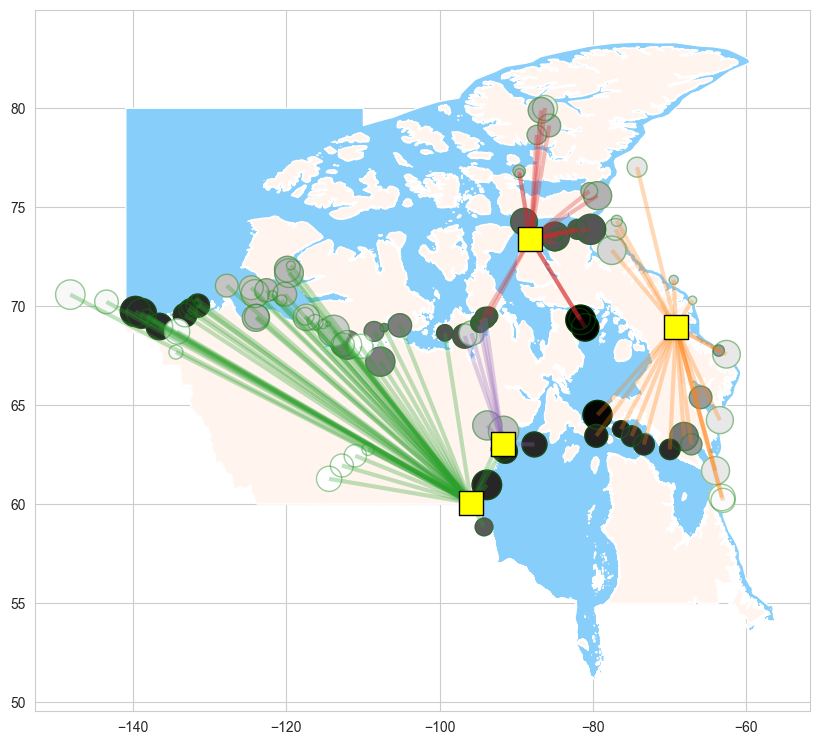

In [23]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s, current_vs_proposed)

## Table 4: Resource deployment from facilities

In [ ]:

selected_st_name = list(select_1s.reset_index().level_0)
selected_st_name

In [ ]:
deploy_1s

In [ ]:
deploy_df = pd.DataFrame(deploy_1s.reset_index())
deploy_df
#deploy_df.columns = ['St', 'os', 'rr','amount']
#print(deploy_df.columns)

In [ ]:
max(Distance_n.values())

In [ ]:
selected_st_name.index

In [ ]:
resource_deployment_from_facility = pd.DataFrame(columns=['M','C','I'])
for index, st in enumerate(selected_st_name):
    a = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'm'), 0].sum()
    b = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'c'), 0].sum()
    c = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'i'), 0].sum()
    resource_deployment_from_facility.loc[index] = [a,b,c]
    
resource_deployment_from_facility.index=selected_st_name
resource_deployment_from_facility

In [ ]:
#deploy_1s
sum(Distance.values()) / len(Distance)
max(Distance.values())

In [ ]:
display(select_1s)
#display(station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)])
display(spill_df)

In [ ]:
selected_supply_stations = list(deploy_1s.reset_index().level_1.unique())
len(selected_supply_stations)#.shape[0]
data_st_selected = station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)].reset_index()
import matplotlib.pyplot as plt

In [ ]:
#data_st_selected.loc[:, 'Station no.'][i] #+ 1

In [ ]:
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, Cu_sor \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))
Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

# Model
model, select, deploy, mvars, names, values, \
        spill_df, station_df, select_1s, deploy_1s, ResponseTimeT, coverage_percentage, assignment  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n, \
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n, DistanceMax,  Cf_s, Cu_sor)

# Draw the network
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s)

In [ ]:
#import model_analysis

In [ ]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s)

In [ ]:
import pandas as pd
df = pd.DataFrame()
#df['ll'] = list([2,10])
#df.loc[1]

In [ ]:
df

In [ ]:
assignment.columns

In [ ]:
assignment

In [ ]:
display(assignment)
display(deploy_1s)

In [ ]:
deploy_reset = deploy_1s.reset_index()
deploy_reset.columns = ['Station no.', 'Spill #', 'Resource Type', 'Quantity deployed']

In [ ]:
display(assignment)

In [ ]:
from matplotlib import collections as mc
import matplotlib.pyplot as plt
unique_stations = assignment['Station no.'].unique()

fig, ax = plt.subplots()
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticLand.plot(ax=ax, color="seashell")

for ust in range(len(unique_stations)):
    d1 = assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()
    d_m = pd.DataFrame(d1.loc[d1['Resource Type'] == 'm'].copy())
    d_c = d1.loc[d1['Resource Type'] == 'c'].copy()
    d_i = d1.loc[d1['Resource Type'] == 'i'].copy()

    new_list_m = []
    for r1 in range(d_m.shape[0]):
        new_list_m.append([(d_m.loc[r1, 'Spill_Longitude'], d_m.loc[r1, 'Spill_Latitude']), (d_m.loc[r1, 'St_Longitude'], d_m.loc[r1, 'St_Latitude'])])
        # d_m.loc[2, 'Spill_Longitude']
        # new_list_m.append([(d_m.Spill_Longitude[r1], d_m.Spill_Latitude[r1]), (d_m.St_Longitude[r1], d_m.St_Latitude[r1])])
        lc_m = mc.LineCollection(new_list_m, colors=f'C{ust + 1}',
                           alpha=.7, linestyle='dashed')  # 'Resource Type' alpha = (ust/len(unique_stations)), colors=ust, linewidths=[1,5,10],
    ax.add_collection(lc_m)

In [ ]:
d_m.loc[2, 'Spill_Longitude']

In [ ]:
d_m.Spill_Longitude[0]

In [ ]:
print(d_m.shape)
print(d1.shape) #.Spill_Longitude[1]
print(d_m.shape[0])
display(d1)
display(d_m)

In [ ]:
d_m
#df.loc[df['col1'] == value]

In [ ]:
assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()

# Model Configuration 2

## Fig5b

# Pareto Front


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_pareto_front = pd.read_excel('Outputs/pareto front.xlsx', sheet_name='pareto front2')
data_pareto_front

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data=data_pareto_front, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200, color='g')
plt.xlabel('Max Coverage')
plt.ylabel('Min Cost')
plt.grid(False)
plt.tight_layout()
plt.savefig('Outputs/pareto_front.png', transparent=True)

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data=data_pareto_front, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200, color='g')
plt.scatter(data=data_pareto_front, x='Max', y='Min',
            alpha=0.5, edgecolors='black', s=200, color='r')
Max = data_pareto_front[['Max']]
Min = data_pareto_front[['Min']]
plt.plot(Max, Min,
            ls='--', alpha=0.5, color='r')
plt.xlabel('Max Coverage')
plt.ylabel('Min Cost')
plt.grid(False)
plt.tight_layout()
#plt.axis('off')
plt.savefig('Outputs/pareto_frontier_points.png', transparent=True)